In [304]:
import pandas as pd

df=pd.read_csv('wine_cleared.csv')

In [305]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [306]:
# для удобства сразу преобразуем признак в int
df['price_round'] = df['price'].round().astype(int)

In [307]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
df['year'] = df['title'].str.findall(regex).str.get(0)

https://ihateregex.io/ - Проверить, насколько точно работает ваше регулярное выражение, а также найти реализацию популярных регулярных выражений (например, поиска номера телефона), вы сможете на сайте

https://tproger.ru/translations/regular-expression-python/ - статья по регулярным выражениям

In [308]:
df['is_usa'] = df['country'].apply(lambda x: 1 if x == 'US' else 0)

In [309]:
df['country'].value_counts().head()

US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
Name: country, dtype: int64

In [310]:
df['is_france'] = df['country'].apply(lambda x: 1 if x == 'France' else 0)
df['is_italy'] = df['country'].apply(lambda x: 1 if x == 'Italy' else 0)
df['is_italy'].sum()

19540

In [311]:
df['is_france'].sum()

22093

In [312]:
df['old_wine']=df['year'].apply(lambda x: 1 if float(x) <2010 else 0)

In [313]:
df['old_wine'].sum()

39781

In [314]:
regex = '.*?\(([^)]*)\).*' #'\((.*?)\)'
df['locality']=df['title'].str.findall(regex).str.get(0)

In [315]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0,0,1,0,Etna
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0,Douro
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1,0,0,0,Willamette Valley
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1,0,0,0,Lake Michigan Shore
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0,0,Willamette Valley


In [316]:
country_population = pd.read_csv('country_population.csv', sep=';')

country_population.head(10)

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
5,Brazil,"214,191,924"
6,Nigeria,"211,401,000"
7,Bangladesh,"172,011,942"
8,Russia,"146,171,015"
9,Mexico,"126,014,024"


In [317]:
country_population[country_population['country']=='Italy']

,country,population
24,Italy,"59,097,904"


In [318]:
df.shape

(129971, 20)

In [319]:
df=df.join(country_population.set_index('country'), on='country')

In [320]:
df.shape

(129972, 21)

In [321]:
country_area = pd.read_csv('country_area.csv', sep=';')

In [322]:
df=df.join(country_area.set_index('country'), on='country')

In [323]:
df[df['title']=='Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area
94,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,...,Gård,22,2014,1,0,0,0,Columbia Valley (WA,"333,022,386",9372610.0


In [324]:
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [325]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [326]:
calls['time_connection']=( calls['created_at']-calls['agent_date']).dt.seconds

In [327]:
calls['time_connection'].sum()

89

In [328]:
calls['is_connection']=calls['duration'].apply(lambda x: 1 if x > 10 else 0) 
calls['is_connection'].sum()

7

In [329]:
calls['time_diff']=( calls['end_date']-calls['agent_date']).dt.seconds

In [330]:
calls['time_diff'].sum()

1144

In [331]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [332]:
import numpy as np
df['date_prod']=df['year'].apply(lambda x: f'{x}-1-1' if x is not np.nan else np.nan)
df['years_diff']=(pd.to_datetime('2022-01-12') -pd.to_datetime(df['date_prod'], errors = 'coerce')).dt.days
df['years_diff'].max()

98627.0

In [333]:
import category_encoders as ce

In [334]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [335]:
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size']])
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [336]:
data_bin = ord_encoder.fit_transform(df[['year']])
df = pd.concat([df, data_bin], axis=1)


In [337]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,is_usa,is_france,is_italy,old_wine,locality,population,area,date_prod,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,1,0,Etna,"59,097,904",301230.0,2013-1-1,3298.0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,Douro,"10,347,892",92391.0,2011-1-1,4029.0,2
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,2013-1-1,3298.0,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0,2013-1-1,3298.0,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,2012-1-1,3664.0,3


In [338]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'])

In [339]:
df=pd.get_dummies(df, columns=['taster_name'])


In [340]:
df.shape

(129972, 44)

In [341]:
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(df['country'])
display(type_bin)
df = pd.concat([df, type_bin], axis=1)
df.shape

,country_0,country_1,country_2,country_3,country_4,country_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,0,1,1
4,0,0,0,0,1,1
...,...,...,...,...,...,...
129966,0,0,0,1,1,0
129967,0,0,0,0,1,1
129968,0,0,0,1,0,1
129969,0,0,0,1,0,1


(129972, 50)

In [342]:
df['taster_twitter_handle'].value_counts()

unknown             31213
@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1006
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

In [343]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования  OneHotEncoder
type_bin = bin_encoder.fit_transform(df['taster_twitter_handle'])
df = pd.concat([df, type_bin], axis=1)
df.shape

(129972, 55)

In [344]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df_= pd.DataFrame(list_of_dicts)
df_.head()

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [345]:
df_ = pd.get_dummies(df_, columns=['product','payment_type'])


In [346]:
df_

,price,product_Product1,product_Product2,product_Product3,payment_type_Amex,payment_type_Mastercard,payment_type_Visa
0,1200,1,0,0,0,1,0
1,3600,0,1,0,0,0,1
2,7500,0,0,1,1,0,0


<AxesSubplot: >

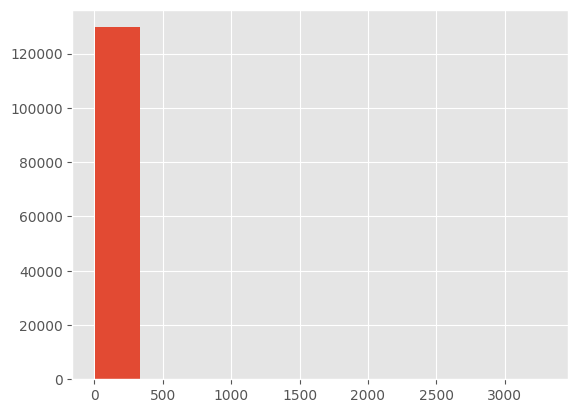

In [347]:
df['price'].hist()

In [348]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_twitter_handle,title,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,0,0,0,0,1,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,0,0,0,1,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,0,0,0,1,1,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,0,0,0,1,1,0,0,1,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,0,0,0,1,1,0,0,0,1,1


In [349]:
# инициализируем нормализатор RobustScaler
from sklearn import preprocessing
import seaborn as sns

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

r_scaler = preprocessing.RobustScaler()
# кодируем исходный датасет
df_r = r_scaler.fit_transform(pd.DataFrame(df['price']))
df_r = pd.DataFrame(df_r, columns=['price_norm'])
df.reset_index(drop= True , inplace= True )#избавляемся от неуникальных индексов
df = pd.concat([df, df_r], axis=1)


In [350]:
df.index.is_unique# проверка индексов на уникальность

True

In [351]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_twitter_handle,title,...,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4,price_norm
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,0,0,0,1,0,0,0,0,1,0.334700
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,0,0,1,0,0,0,0,1,0,-0.590909
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,0,0,1,1,0,0,0,1,1,-0.636364
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,0,0,1,1,0,0,1,0,0,-0.681818
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,0,0,1,1,0,0,0,1,1,1.681818


In [352]:
r_scaler = preprocessing.StandardScaler()
# кодируем исходный датасет
df_r = r_scaler.fit_transform(pd.DataFrame(df['price']))
df_r = pd.DataFrame(df_r, columns=['price_std'])
#df.reset_index(drop= True , inplace= True )#избавляемся от неуникальных индексов
df = pd.concat([df, df_r], axis=1)


In [354]:
df['price_std'][129968]

1.001514868120814

C:\Users\novikova_a\AppData\Local\Temp\ipykernel_18396\2314100023.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True) # включаем отображение коэффициентов


<AxesSubplot: >

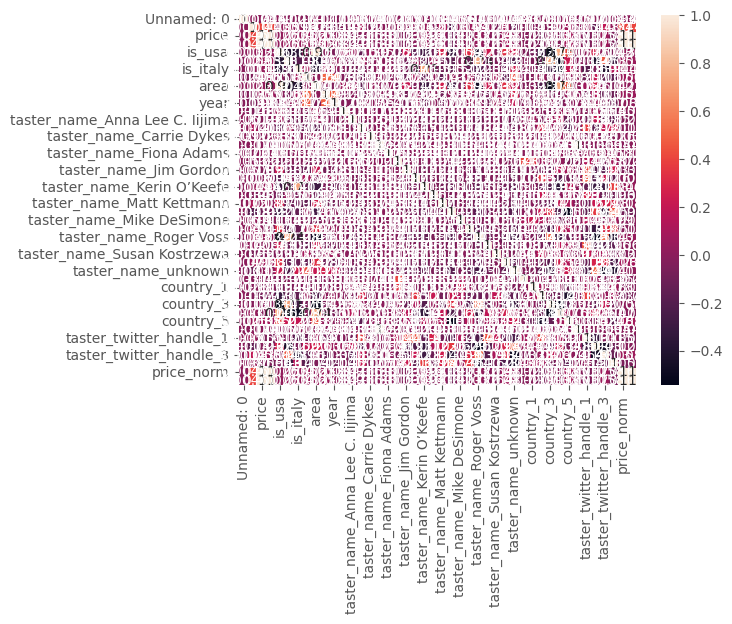

In [355]:
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(df.corr(), annot=True) # включаем отображение коэффициентов

In [358]:
df.corr().max()

C:\Users\novikova_a\AppData\Local\Temp\ipykernel_18396\927863420.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().max()


Unnamed: 0                        1.0
points                            1.0
price                             1.0
price_round                       1.0
is_usa                            1.0
is_france                         1.0
is_italy                          1.0
old_wine                          1.0
area                              1.0
years_diff                        1.0
year                              1.0
taster_name_Alexander Peartree    1.0
taster_name_Anna Lee C. Iijima    1.0
taster_name_Anne Krebiehl MW      1.0
taster_name_Carrie Dykes          1.0
taster_name_Christina Pickard     1.0
taster_name_Fiona Adams           1.0
taster_name_Jeff Jenssen          1.0
taster_name_Jim Gordon            1.0
taster_name_Joe Czerwinski        1.0
taster_name_Kerin O’Keefe         1.0
taster_name_Lauren Buzzeo         1.0
taster_name_Matt Kettmann         1.0
taster_name_Michael Schachner     1.0
taster_name_Mike DeSimone         1.0
taster_name_Paul Gregutt          1.0
taster_name_